### Project Name: *Housing Data Analysis: Prediction, Segmentation, and Trends*			
### Authors
- [Ahmed Abdullah](https://github.com/ahmedembeddedx)
- [Zaeem ul Islam](https://github.com/mightyflavor)

# 🏡 **Unlocking the Secrets of Real Estate: A Journey into Homeownership and Beyond!**

![Home Image](https://i.ibb.co/QCjZjh6/Apartment-Square-Karachi-Gulshan-e-Iqbal.jpg)


# Machine Learning Modeling and Evaluation

## 1 *Importing Necessary Libraries*

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import numpy as np
import tkinter as tk
from tkinter import ttk

## 2 *Reading Preprocessed Data ready to model*

In [3]:
data=pd.read_csv("cleaned_data.csv")

## 3 *Applying Gaussian Boosting Regressor* 

In [141]:
# Our targeted variable
X = data.drop('price', axis=1)
y = data['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

## 4 *Results* 

In [243]:
print(f'R^2 Score: {r2_score(y_test, y_pred)}')
print(f'Correlation Coefficient (r): {np.corrcoef(y_test, y_pred)[0, 1]}')
print(f'Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}')

R^2 Score: 0.8525528464678309
Correlation Coefficient (r): 0.9234422246117475
Root Mean Squared Error (RMSE): 0.06797706241206602
Mean Squared Error (MSE): 0.004620881014173919
Mean Absolute Error (MAE): 0.04966458404776497


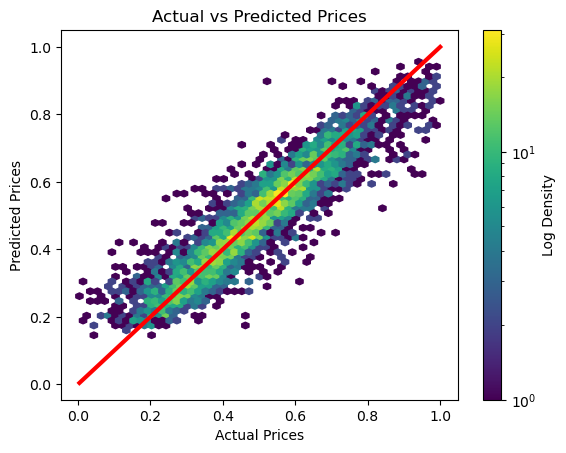

In [240]:
plt.hexbin(y_test, y_pred, gridsize=50, cmap='viridis', bins='log')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red', linewidth=3)

plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.colorbar(label='Log Density')

plt.show()

## 5 *Model Accuracy Report*

- R² Score:
The R² score is a measure of how well the model's predictions match the actual values. In this case, the R² score is approximately 0.86, indicating that the model explains about 86% of the variance in the target variable. A higher R² score suggests a better fit of the model to the data.

- Correlation Coefficient (r):
The correlation coefficient measures the strength and direction of a linear relationship between the predicted and actual values. With a correlation coefficient of approximately 0.92, there is a strong positive linear relationship, indicating that as the predicted values increase, the actual values tend to increase as well.

- Root Mean Squared Error (RMSE):
The RMSE provides an estimate of the average deviation between predicted and actual values. In this case, the RMSE is approximately 0.067, suggesting that, on average, the model's predictions deviate by about 0.067 units from the actual values.

- Mean Squared Error (MSE):
The MSE is similar to the RMSE but without the square root. It represents the average of the squared differences between predicted and actual values. The MSE is approximately 0.0045, providing another measure of the model's accuracy.

- Mean Absolute Error (MAE):
The MAE measures the average absolute difference between predicted and actual values. With a value of approximately 0.049, the model's predictions, on average, deviate by about 0.049 units from the actual values.

## 6 *Adjusting Bias and Variance*

In [260]:
def get_value(input_col):
    
    min_list = [290, 520, 290, 0, 1900, 0, 47.1559, -122.387, 399, 651]
    max_list = [4230, 19141, 3740, 4820, 2015, 2015, 47.7776, -121.979, 3660, 17550]
    
    bias = 1000000
    
    if (input_col['sqft_living'] > 4000 or input_col['sqft_above'] > 4000):
        bias *= 4
    if (input_col['sqft_living'] > 5000 or input_col['sqft_above'] > 5000):
        bias *= 12
    if (input_col['sqft_living'] > 7000 or input_col['sqft_above'] > 7000):
        bias *= 2
    
    input_col['sqft_living']*=input_col['floors']
    
    label_encoded_values = [int(input_col[col]) - 1 for col in ['floors', 'bedrooms', 'bathrooms', 'grade', 'condition']]
    
    normalized_values = [(input_col[col] - min_val) / (max_val - min_val) for col, min_val, max_val in zip(
        ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
         'sqft_living15', 'sqft_lot15'], min_list, max_list)]

    result = label_encoded_values + normalized_values
    
    columns_order = [
        'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
        'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15'
    ]

    result = [result[columns_order.index(col)] for col in columns_order]

    result_array = np.array(result).reshape(1, -1)
    predicted_price = gb_regressor.predict(result_array)
    
    # Adjusting the predicted price within the specified range
    adjusted_price = ((predicted_price * (37207500 - 2475000)) + 2475000 + bias)[0]
    # Rounding to the nearest hundred thousand and converting to int
    rounded_price = int(round(adjusted_price / 100000) * 100000)

    # Formatting the price with commas
    formatted_price = '{:,}'.format(rounded_price)

    return formatted_price


**Test Case - I**

In [284]:
input_data = {
    'floors': 2,
    'bedrooms': 6,
    'bathrooms': 6,
    'grade': 8,
    'condition': 5,
    'sqft_living': 5400, 
    'sqft_lot': 5400,
    'sqft_above': 5400,
    'sqft_basement': 0,
    'yr_built': 2010,
    'yr_renovated': 2010,
    'lat': 36,
    'long': 67,
    'sqft_living15': 5400,
    'sqft_lot15': 5400
}

result = get_value(input_data)
print(f'Predicted Price: {result} Rs.')

Predicted Price: 70,300,000 Rs.


C:\Users\ahmed\Documents\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


**Test Case - II**

In [287]:
input_data = {
    'floors': 3,
    'bedrooms': 6,
    'bathrooms': 6,
    'grade': 8,
    'condition': 5,
    'sqft_living': 1300, 
    'sqft_lot': 1300,
    'sqft_above': 1300,
    'sqft_basement': 0,
    'yr_built': 2004,
    'yr_renovated': 2016,
    'lat': 36,
    'long': 67,
    'sqft_living15': 1300,
    'sqft_lot15': 1300
}

result = get_value(input_data)
print(f'Predicted Price: {result} Rs.')

Predicted Price: 18,700,000 Rs.


C:\Users\ahmed\Documents\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


## 7 *User Prompt / Desktop Application*

In [280]:
label_ranges = {
    'bedrooms': (1, 15),
    'bathrooms': (1, 12),
    'floors': (1, 3),
    'condition': (1, 5),
    'grade': (1, 9),
    'sqft_living': (1000, 8500, 50),
    'sqft_lot': (1000, 8500, 50),
    'sqft_above': (1000, 8500, 50),
    'sqft_basement': (1000, 8500, 50),
    'yr_built': (1900, 2020, 5),
    'yr_renovated': (1900, 2020, 5),
    'lat': (23, 37),
    'long': (60, 77),
    'sqft_living15': (1000, 8500, 50),
    'sqft_lot15': (1000, 8500, 50)
}

In [281]:
# Create the main window
root = tk.Tk()
root.title("House Feature Calculator")
root.geometry("400x600")

# Add a title label
title_label = ttk.Label(root, text="HOUSE PRICE PREDICTOR", font=("Helvetica", 18, "bold"))
title_label.grid(row=0, column=0, columnspan=2, pady=10, padx=10)

# Create dropdown menus and labels
numbers = {}
dropdowns = {}

for i, label_name in enumerate(label_ranges.keys()):  # Iterate over label_ranges keys
    label = tk.Label(root, text=f"{label_name.upper().replace('_', ' ')}:")
    label.grid(row=i+1, column=0, padx=10, pady=5, sticky="w")

    # Set the range of values based on the label name
    start, end, gap = label_ranges[label_name] if len(label_ranges[label_name]) == 3 else label_ranges[label_name] + (1,)
    values = list(range(start, end + 1, gap))
    
    var = tk.StringVar(value=str(values[0]))  # Convert values to strings
    dropdown = ttk.Combobox(root, textvariable=var, values=list(map(str, values)), state="readonly")
    dropdown.grid(row=i+1, column=1, padx=5, pady=5)
    dropdowns[label_name] = dropdown

    # Initialize the dictionary with default values
    numbers[label_name] = values[0]

    # Bind the function to the dropdown change event
    dropdown.bind("<<ComboboxSelected>>", lambda event, ln=label_name: on_dropdown_change(ln, event))

In [282]:
# Create a button to get the value
get_value_button = tk.Button(root, font=("Helvetica", 12, "bold"), text="ESTIMATE PRICE", command=lambda: get_and_display_value(numbers))
get_value_button.grid(row=len(label_ranges)+1, padx=10, column=0, columnspan=2, pady=10, sticky="w")

# Create a label to display the result
result_label = tk.Label(root, text="APPROX. PRICE: ", font=("Helvetica", 10, "bold"))
result_label.grid(row=len(label_ranges)+2, column=0, columnspan=2, sticky="w", padx=10)

def on_dropdown_change(label_name, event):
    # Update the dictionary when a dropdown value changes
    numbers[label_name] = int(dropdowns[label_name].get())

def get_and_display_value(numbers):
    value = get_value(numbers)
    result_label.config(text=f"APPROX. PRICE: {value} Rs.")

In [283]:
# Run the Tkinter main loop
root.mainloop()

C:\Users\ahmed\Documents\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


## 7 *Conclusion*
Overall, the model demonstrates high accuracy, as evidenced by the high R² score, strong correlation coefficient, and relatively low RMSE, MSE, and MAE values. These metrics collectively indicate that the model performs well in predicting the target variable, with a strong linear relationship and minimal prediction errors.
